### 正規分布

統計つっても正規分布に関するもの。  
正規分布はガウス分布ともいわれてる。

[https://bellcurve.jp/statistics/course/7797.html:embed:cite]

この辺が分かりやすいはず。

要するに、平均値を中心（かつ最大出現数）に対象に見えるデータ分布をガウス分布と呼んでる。

例えば平均点 65 点で、標準偏差 10 点のテストがあるとしたとき、データはこんな感じ。  
`200` 行程作成してみた。

In [1]:
scores = [
    69, 90, 77, 52, 69, 64, 55, 58, 77, 70, 55, 69, 75, 74, 78, 52, 68, 76, 78, 96,
    74, 64, 77, 60, 68, 61, 79, 67, 63, 71, 66, 75, 84, 76, 66, 65, 61, 54, 58, 41,
    58, 65, 69, 75, 67, 74, 54, 60, 66, 64, 67, 82, 75, 70, 64, 80, 71, 71, 39, 85,
    79, 68, 54, 48, 75, 68, 51, 61, 58, 46, 66, 62, 85, 75, 53, 77, 53, 61, 58, 54,
    66, 70, 65, 71, 67, 58, 67, 97, 53, 39, 65, 45, 54, 72, 65, 79, 63, 32, 58, 77,
    70, 58, 68, 65, 55, 49, 63, 65, 73, 71, 59, 68, 77, 64, 55, 84, 56, 68, 71, 73,
    65, 68, 69, 64, 72, 57, 60, 46, 60, 74, 60, 55, 60, 79, 63, 52, 68, 55, 73, 71,
    46, 57, 76, 66, 93, 61, 85, 76, 65, 76, 74, 72, 85, 72, 63, 58, 77, 52, 64, 60,
    70, 65, 61, 79, 82, 55, 59, 61, 90, 56, 75, 70, 76, 55, 62, 60, 52, 60, 56, 55,
    48, 43, 75, 66, 54, 75, 62, 66, 66, 79, 43, 54, 68, 54, 60, 64, 74, 83, 64, 73
]

因みにこれは Excel で自動生成したデータで、`=NORMINV(RAND(), 65, 10)` とか打ち込んでやれば生成できる。  
厳密には、`CEILING.MATH` で小数点以下も削ってるがご愛敬。

このままだと分かりづらいので、自分が分かりやすい `pandas` に型変換して

In [2]:
import pandas as pd
import numpy as np

score_se = pd.Series(pd.array(scores))
score_np = np.array(scores)
print(score_se)

0      69
1      90
2      77
3      52
4      69
       ..
195    64
196    74
197    83
198    64
199    73
Length: 200, dtype: Int64


まずは統計量出そうか

In [3]:
score_se.describe()

count    200.000000
mean      65.670000
std       10.984278
min       32.000000
25%       58.000000
50%       66.000000
75%       74.000000
max       97.000000
dtype: float64

`matplotlib` でヒストグラムにしてみる。  
なんとなく左右対称なのが見えるはず

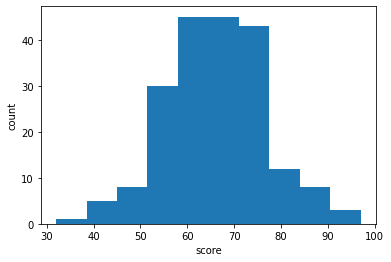

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('score')
plt.ylabel('count')
plt.hist(score_se, bins=10)
plt.show()

大分真面目に記述すると、

#### 平均値

各データ足し合わせして、データ数で割るので

$$
  \mu = \frac{ \sum^n_{k=1}x_k }{n}
$$


In [5]:
# まぁ出し方いっぱいあるよって
print(score_se.mean())
print(sum(scores)/len(scores))
print(np.average(score_np))

65.67
65.67
65.67


### 分散値

各データの平均値との差を2乗したもの

$$
    \sigma^2 = \frac{ \sum^n_{k=1}(x_k - \mu)^2 }{n}
$$

計算してみると、小数点以下に差が出てくるけど、計算上の丸め誤差だろうか？

In [6]:
print(score_se.var())
print((sum([(v - 65.67) ** 2 for v in scores]))/len(scores))
print(np.var(score_np))

120.65437185929649
120.05110000000005
120.0511


### 標準偏差

これは分散のルートを取るだけ。

$$
\sigma = \sqrt{ \frac{ \sum^n_{k=1}(x_k - \mu)^2 }{n} }
$$

In [7]:
import math

print(score_se.std())
print(math.sqrt((sum([(v - 65.67) ** 2 for v in scores]))/len(scores)))
print(np.std(score_np))

10.984278395019697
10.956783287078377
10.956783287078375


### おまけ

事前データを Excel で作ってたけど、Python でも生成可能

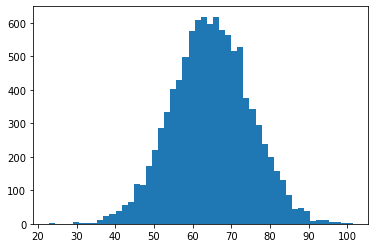

In [8]:
normal_vars = np.random.normal(65, 10, 10000)
plt.hist(normal_vars, bins=50)
plt.show()